<a href="https://colab.research.google.com/github/sangeethak15-AI/basic-nn-model/blob/main/Dlex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

In [2]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
worksheet = gc.open('dlee').sheet1

In [3]:
rows = worksheet.get_all_values()
df = pd.DataFrame(rows[1:], columns=rows[0])
df=df.astype({'Input':'float'})
df=df.astype({'Output':'float'})
df.head()

,Input,Output
0,1.0,16.0
1,2.0,17.0
2,3.0,18.0
3,4.0,19.0
4,5.0,20.0


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [5]:
X = df[['Input']].values
y = df[['Output']].values


In [6]:
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.]])

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)
Scaler = MinMaxScaler()
Scaler.fit(X_train)


MinMaxScaler()

In [8]:
X_train1 = Scaler.transform(X_train)

In [9]:
model=Sequential([
    #Hidden ReLU Layers
    Dense(units=5,activation='relu',input_shape=[1]),
    Dense(units=3,activation='relu'),
    #Linear Output Layer
    Dense(units=1)
])

In [10]:
model.compile(optimizer='rmsprop',loss='mse')
model.fit(X_train1,y_train,epochs=4000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 9ms/step - loss: 6.3605e-04
Epoch 1502/4000
1/1 [==============================] - 0s 9ms/step - loss: 6.3092e-04
Epoch 1503/4000
1/1 [==============================] - 0s 9ms/step - loss: 6.2735e-04
Epoch 1504/4000
1/1 [==============================] - 0s 10ms/step - loss: 6.1960e-04
Epoch 1505/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.1587e-04
Epoch 1506/4000
1/1 [==============================] - 0s 12ms/step - loss: 6.1024e-04
Epoch 1507/4000
1/1 [==============================] - 0s 7ms/step - loss: 6.1025e-04
Epoch 1508/4000
1/1 [==============================] - 0s 12ms/step - loss: 6.0910e-04
Epoch 1509/4000
1/1 [==============================] - 0s 7ms/step - loss: 6.1322e-04
Epoch 1510/4000
1/1 [==============================] - 0s 7ms/step - loss: 6.1529e-04
Epoch 1511/4000
1/1 [==============================] - 0s 6ms/step - loss: 6.2120e-04
Epoch 1512/4000


<Axes: >

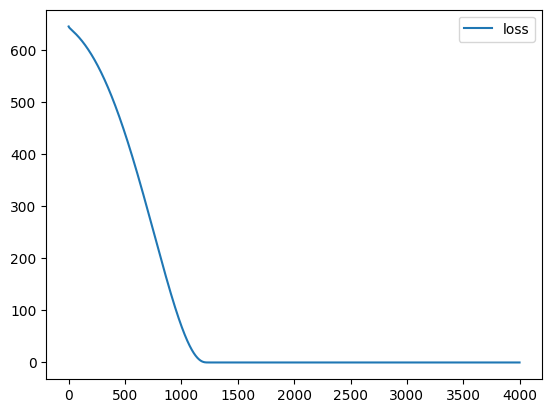

In [11]:
loss= pd.DataFrame(model.history.history)
loss.plot()

In [12]:

X_test1 =Scaler.transform(X_test)
model.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 200ms/step - loss: 0.0013


0.0013019723119214177

In [13]:
X_n1=[[5]]
X_n1_1=Scaler.transform(X_n1)
model.predict(X_n1_1)

1/1 [==============================] - 0s 177ms/step


array([[19.980616]], dtype=float32)